In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset (1).csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


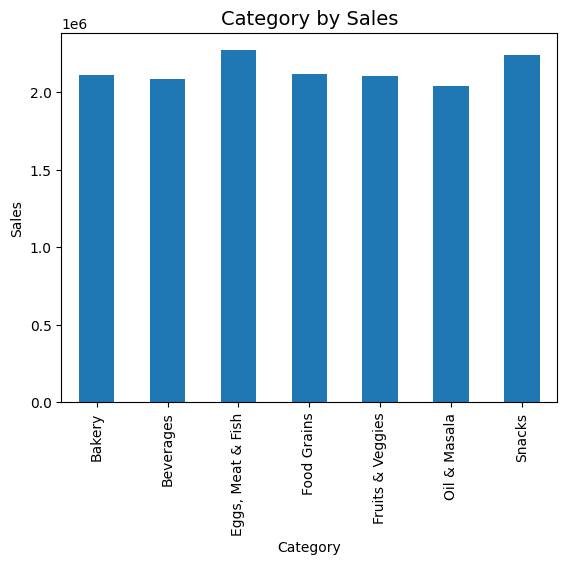

In [ ]:
Sales_category=df.groupby("Category")["Sales"].sum()
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%b')
df['year'] = df['Order Date'].dt.year

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,8.0,Aug,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,8.0,Aug,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,12.0,Dec,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,11.0,Nov,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,11.0,Nov,2016.0


ValueError: The number of FixedLocator locations (48), usually from a call to set_ticks, does not match the number of labels (12).

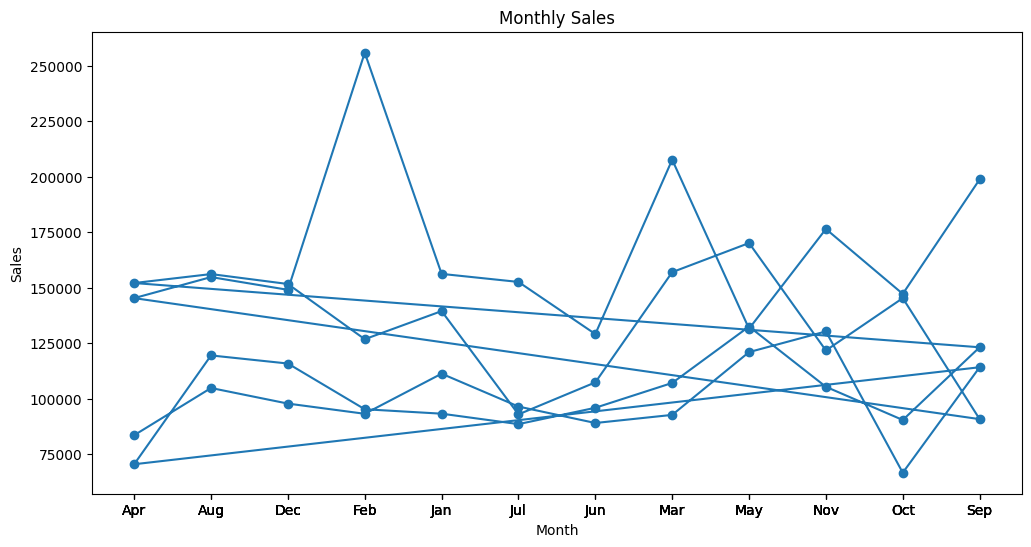

In [ ]:
monthly_sales = df.groupby(['year', 'month_no', 'Month'])['Sales'].sum().reset_index()
monthly_sales_sorted = monthly_sales.sort_values(by=['year', 'month_no'])
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_sorted['Month'], monthly_sales_sorted['Sales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'].unique(), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

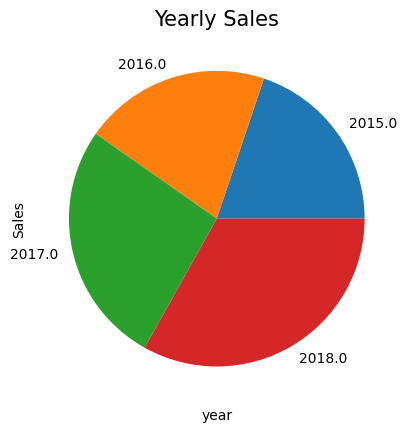

In [ ]:
Yearly_Sales=df.groupby("year")["Sales"].sum()
Yearly_Sales.plot(kind='pie')
plt.title('Yearly Sales', fontsize = 15)
plt.xlabel('year')
plt.ylabel('Sales')
plt.show()


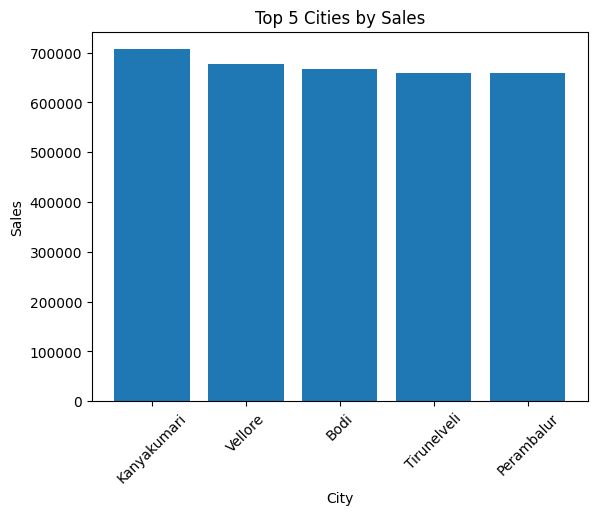

In [ ]:

city_sales = df[['City', 'Sales']]
total_sales = city_sales.groupby('City').sum()
sorted_cities = total_sales.sort_values(by='Sales', ascending=False)
top_cities = sorted_cities.head(5)
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()
